# Robust High-Resolution Video Matting with Temporal Guidance.

![Teaser](https://raw.githubusercontent.com/PeterL1n/RobustVideoMatting/master/documentation/image/teaser.gif)

[Project Site](https://peterl1n.github.io/RobustVideoMatting) | [GitHub](https://github.com/PeterL1n/RobustVideoMatting) | [Paper](https://arxiv.org/abs/2108.11515)


## Colab Demo
This colab notebook is set up to let you quickly test our model on your video.

### Option 1: Upload your video

Run the cell below and upload your own video. (Only tested on .mp4 files)

In [9]:
import os
from google.colab import files

uploaded = files.upload()           # Use colab upload dialog.
uploaded = list(uploaded.keys())    # Get uploaded filenames.
assert len(uploaded) == 1           # Make sure only uploaded one file.
output_type = 'video'
img_dir = 'input.mp4'
output_dir = "com.mp4" 
os.rename(uploaded[0], img_dir) # Rename file to "input.mp4".

Saving driver.mp4 to driver.mp4


### Option 2: Try our demo video

Run the cell below to download our demo video. Skip it if you have uploaded your own video.

In [ ]:
!gdown https://drive.google.com/uc?id=1I0v72-hNlK1hm9q1OwyaATUYApXpotS6 -O input.mp4
img_dir= "input.mp4"
output_dir = "com.mp4"
output_type = 'video'

### Option 3: Upload your image
Run the cell below and upload your own image

In [12]:
# @title Select image sequence folder
img_dir= "/content/img/" #@param 
output_dir = "/content/out/" #@param
output_type = 'png_sequence'
os.makedirs(img_dir, exist_ok=True)
%cd {img_dir}
uploaded = files.upload()           # Use colab upload dialog.
uploaded = list(uploaded.keys())    # Get uploaded filenames.
os.rename(uploaded[0], 'img.png') # Rename file to 
%cd /content/

/content/img


Saving me vol.2.jpg to me vol.2.jpg
/content


### Start Inference

Run the cells below to process your video.

In [5]:
!pip install --quiet av pims

     |████████████████████████████████| 28.2 MB 1.2 MB/s 
     |████████████████████████████████| 86 kB 5.7 MB/s 


In [6]:
import torch

model = torch.hub.load("PeterL1n/RobustVideoMatting", "mobilenetv3").cuda() # or "resnet50"
convert_video = torch.hub.load("PeterL1n/RobustVideoMatting", "converter")

Downloading: "https://github.com/PeterL1n/RobustVideoMatting/archive/master.zip" to /root/.cache/torch/hub/master.zip
Downloading: "https://github.com/PeterL1n/RobustVideoMatting/releases/download/v1.0.0/rvm_mobilenetv3.pth" to /root/.cache/torch/hub/checkpoints/rvm_mobilenetv3.pth


  0%|          | 0.00/14.5M [00:00<?, ?B/s]

Using cache found in /root/.cache/torch/hub/PeterL1n_RobustVideoMatting_master


Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3686400/45929032 bytes (8.0%)7798784/45929032 bytes (17.0%)11575296/45929032 bytes (25.2%)15646720/45929032 bytes (34.1%)19619840/45929032 bytes (42.7%)23519232/45929032 bytes (51.2%)27590656/45929032 bytes (60.1%)31588352/45929032 bytes (68.8%)35438592/45929032 bytes (77.2%)39444480/45929032 bytes (85.9%)43556864/45929032 bytes (94.8%)45929032/45929032 bytes (100.0%)
  Done
File saved as /root

In [14]:
convert_video(
    model,                           # The loaded model, can be on any device (cpu or cuda).
    input_source=img_dir,        # A video file or an image sequence directory.
    downsample_ratio=None,           # [Optional] If None, make downsampled max size be 512px.
    output_type=output_type,             # Choose "video" or "png_sequence"
    output_composition=output_dir ,    # File path if video; directory path if png sequence.
    output_alpha="pha.mp4",          # [Optional] Output the raw alpha prediction.
    output_foreground="fgr.mp4",     # [Optional] Output the raw foreground prediction.
    output_video_mbps=4,             # Output video mbps. Not needed for png sequence.
    seq_chunk=12,                    # Process n frames at once for better parallelism.
    num_workers=1,                   # Only for image sequence input. Reader threads.
    progress=True                    # Print conversion progress.
)

  0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
# @title Visualise video results
from IPython.display import HTML
from base64 import b64encode
mp4 = open(output_dir,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

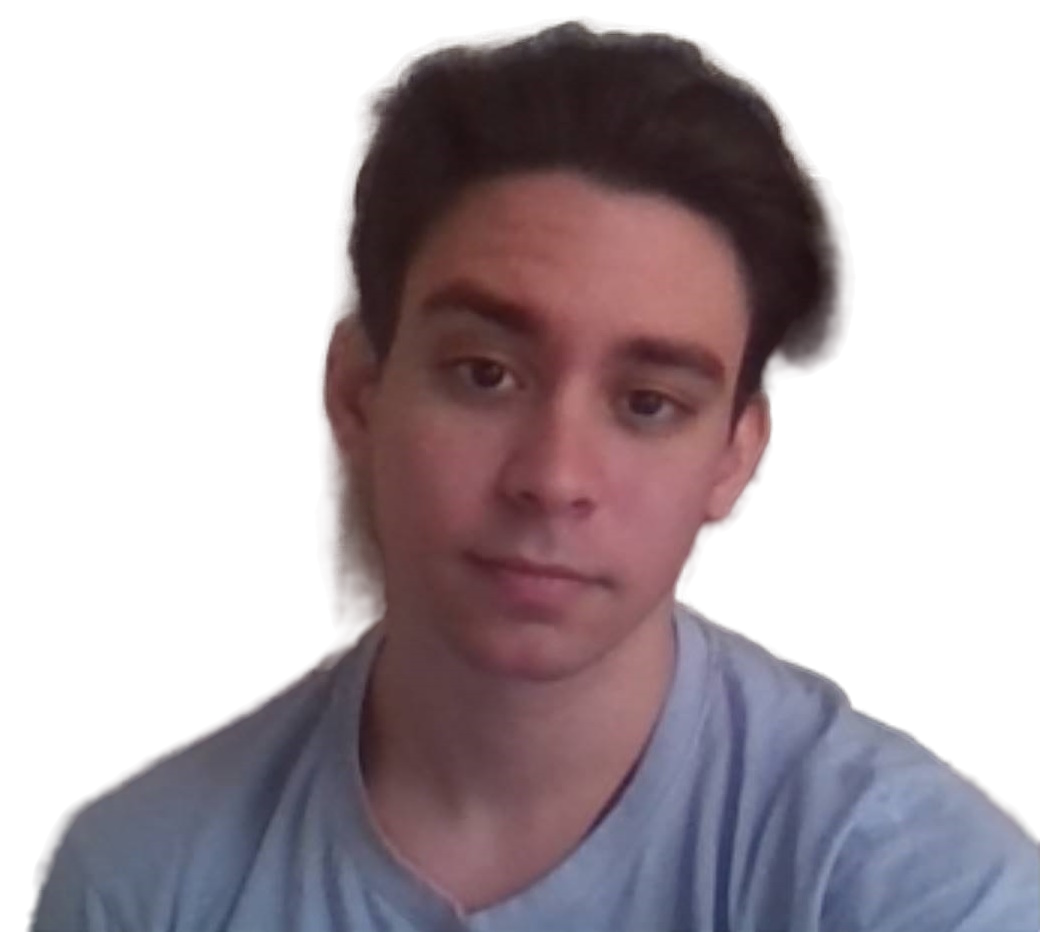

In [25]:
# @title Show image
from IPython.display import Image, display
for img in os.listdir(output_dir):
  fullpath = output_dir + img
  display(Image(fullpath, width=300, height=200)) 

In [ ]:
# @title Get face Mask

In [ ]:
# @title Get face/pose estimation

### Download results

After the processing is done, you can download the results from the files panel on the left.

* `com.mp4`: The matting result composited on top of a green screen background.
* `pha.mp4`: The raw alpha matte.
* `fgr.mp4`: The raw foreground prediction.

or 
* `out/0000.png`: Matting result for a single image